In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#uploading data files
from google.colab import files
upload = files.upload()

Saving udemy_courses.csv to udemy_courses.csv


In [54]:
#reading data file using padas
df = pd.read_csv("udemy_courses.csv")
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [55]:
print(df.columns)
print(df.shape)

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')
(3678, 12)


In [56]:
print(f"Dataframe shape : {df.shape}")
for column in df.columns:
    print(f"{column} : {len(df[column].value_counts())}")
#number of unique values in each column

Dataframe shape : (3678, 12)
course_id : 3672
course_title : 3663
url : 3672
is_paid : 2
price : 38
num_subscribers : 2197
num_reviews : 511
num_lectures : 229
level : 4
content_duration : 105
published_timestamp : 3672
subject : 4


The shape of Dataframe is (3678,10) but the number of course id's are 3672 so there must be some duplicate rows in the dataframe

In [57]:
df = df.drop_duplicates() #removing duplicates
print(df.shape) 

(3672, 12)


duplicate rows are removed

In [58]:
df.isnull().sum() #check if there are any null values

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

There are no null values in the dataframe

In [59]:
#analyse all numeric columns using describe()
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# Major conclusions from the above table are as follows:

1.  There are courses containing no lectures as well as no content duration
2.  content duration and number of lectures at 75th percentile are only 4.5 hrs and 26 while their maximum is 78.5 and 779
3.  number of subscribers at 75th percentile is 2548.75 while its maximum is 268923.0
4.  number of reviews at 75th percentile are 67 while its maximum is 27445
5.  maximum price of any course is 200
6.  There are courses with 0 subscribers
7.  maximum content duration is 78.5 hrs

In [60]:
print(df["level"].unique())
print(df["subject"].unique())
print(df["is_paid"].unique())

['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']
[ True False]


In [61]:
df.loc[:,"levels"] = -1
df.loc[df["level"]=="All Levels","levels"]=0
df.loc[df["level"]=="Intermediate Level","levels"]=2
df.loc[df["level"]=="Beginner Level","levels"]=1
df.loc[df["level"]=="Expert Level","levels"]=3

df.loc[:,"subjects"] = -1
df.loc[df["subject"]=="Business Finance","subjects"]=0
df.loc[df["subject"]=="Graphic Design","subjects"]=2
df.loc[df["subject"]=="Musical Instruments","subjects"]=1
df.loc[df["subject"]=="Web Development","subjects"]=3

df.loc[:,"paid_or_not"] = -1
df.loc[df["is_paid"]== False,"paid_or_not"] = 0
df.loc[df["is_paid"]== True,"paid_or_not"] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df = df.drop(columns = ["level","subject","is_paid"] )

In [63]:
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,levels,subjects,paid_or_not
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,200,2147,23,51,1.5,2017-01-18T20:58:58Z,0,0,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,75,2792,923,274,39.0,2017-03-09T16:34:20Z,0,0,1
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,45,2174,74,51,2.5,2016-12-19T19:26:30Z,2,0,1
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,95,2451,11,36,3.0,2017-05-30T20:07:24Z,0,0,1
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,200,1276,45,26,2.0,2016-12-13T14:57:18Z,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,100,1040,14,21,2.0,2016-06-14T17:36:46Z,0,3,1
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,25,306,3,42,3.5,2017-03-10T22:24:30Z,1,3,1
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,40,513,169,48,3.5,2015-12-30T16:41:42Z,0,3,1
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,50,300,31,38,3.0,2016-08-11T19:06:15Z,0,3,1


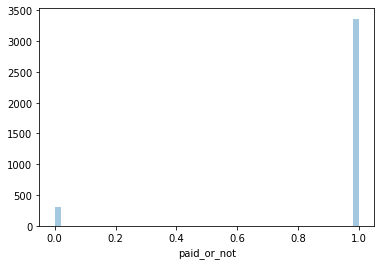

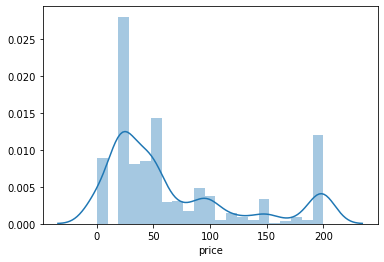

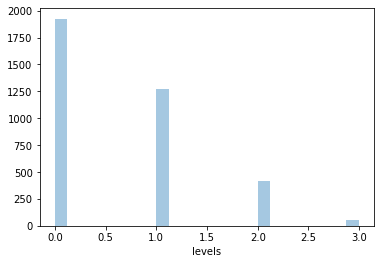

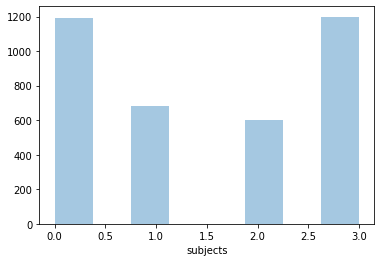

In [64]:
#plotting barplots for categorical data
p1 = sns.distplot(df["paid_or_not"],kde = False)
plt.show()
p2 = sns.distplot(df["price"],kde = True)
plt.show()
p2 = sns.distplot(df["levels"],kde = False)
plt.show()
p2 = sns.distplot(df["subjects"],kde = False)
plt.show()

In [65]:
print(df["paid_or_not"].value_counts())
print("-"*20)
print(df["levels"].value_counts())
print("-"*20)
print(df["subjects"].value_counts())
print("-"*20)

1    3362
0     310
Name: paid_or_not, dtype: int64
--------------------
0    1925
1    1268
2     421
3      58
Name: levels, dtype: int64
--------------------
3    1199
0    1191
1     680
2     602
Name: subjects, dtype: int64
--------------------


# Conclusions from above:

*   The number of paid courses are much higher than non_paid
*   number of "All levels" courses courses are most,much higher than "Expert Level" courses followed by "Intermediate level" courses
*   number of "web development" and "Business Finance" courses are comparable and higher than the other two
*   most of the courses have price range between 0-50


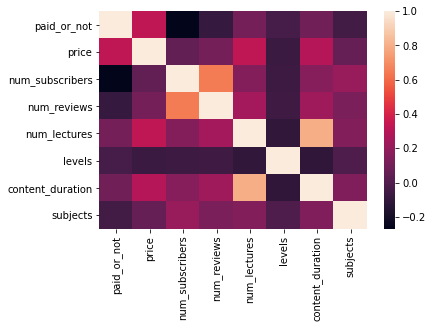

In [66]:
sns.heatmap(df[['paid_or_not', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'levels',
       'content_duration', 'subjects']].corr())

In [67]:
df[['paid_or_not', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'levels',
       'content_duration', 'subjects']].corr()

,paid_or_not,price,num_subscribers,num_reviews,num_lectures,levels,content_duration,subjects
paid_or_not,1.000000,0.328910,-0.267056,-0.087445,0.112788,-0.032982,0.094594,-0.041110
price,0.328910,1.000000,0.050436,0.113568,0.329944,-0.073455,0.293200,0.065144
num_subscribers,-0.267056,0.050436,1.000000,0.651070,0.158351,-0.061454,0.162118,0.214254
num_reviews,-0.087445,0.113568,0.651070,1.000000,0.243019,-0.055654,0.228852,0.125489
num_lectures,0.112788,0.329944,0.158351,0.243019,1.000000,-0.102552,0.801624,0.150738
levels,-0.032982,-0.073455,-0.061454,-0.055654,-0.102552,1.000000,-0.107397,-0.008831
content_duration,0.094594,0.293200,0.162118,0.228852,0.801624,-0.107397,1.000000,0.141784
subjects,-0.041110,0.065144,0.214254,0.125489,0.150738,-0.008831,0.141784,1.000000


Total paid courses:3362, Total unpaid courses:310
levels          0     1    2   3
paid_or_not                     
0             122   158   30   0
1            1803  1110  391  58


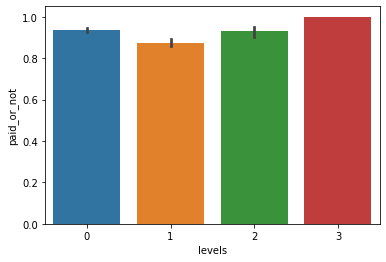

In [68]:
sns.barplot(x = "levels",y = "paid_or_not",data = df)
print("Total paid courses:{}, Total unpaid courses:{}".format(df["paid_or_not"].value_counts().values[0],df["paid_or_not"].value_counts().values[1]))
print(pd.crosstab(df["paid_or_not"], df["levels"]))
#levels and the if paid or not
#shows that 1.Expert level is not included in unpaid courses
#2.



*   There are no non paid courses for "expert level" courses
*   Most of the non paid courses are of "Intermediate level"




In [69]:
print(df.loc[df["paid_or_not"]==0,"num_subscribers"].to_frame().describe())
print("-"*30)
print(df.loc[df["paid_or_not"]==1,"num_subscribers"].to_frame().describe())

       num_subscribers
count       310.000000
mean      11533.951613
std       23620.569473
min           1.000000
25%        2222.250000
50%        4869.500000
75%       10637.500000
max      268923.000000
------------------------------
       num_subscribers
count      3362.000000
mean       2421.270077
std        6326.164761
min           0.000000
25%          90.250000
50%         736.000000
75%        2058.250000
max      121584.000000


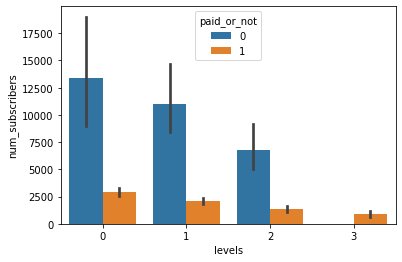

In [70]:
sns.barplot(x = df["levels"],y=df["num_subscribers"],hue = df["paid_or_not"])

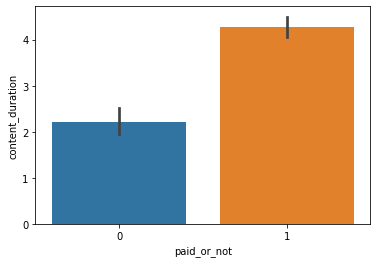

In [71]:
sns.barplot(x = df["paid_or_not"],y = df["content_duration"])

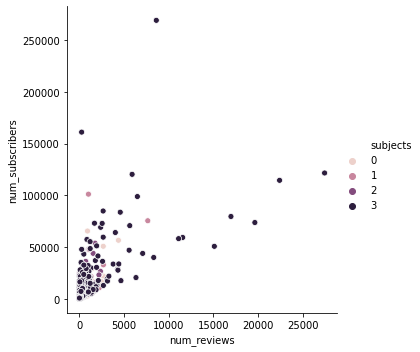

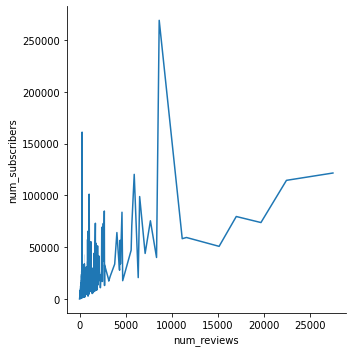

In [72]:
sns.relplot(x = "num_reviews",y = "num_subscribers",hue = "subjects",data = df)
plt.show()
sns.relplot(x = "num_reviews",y = "num_subscribers",kind = "line",data = df)
plt.show()


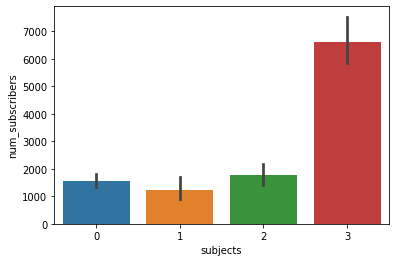

In [73]:
sns.barplot(x = df["subjects"],y = df["num_subscribers"],)



*   according to heatmap number of reviews has the most effects on subscribers
*   we can see that generally as the  number of reviews increase the number of subscribers also increase
*   web development courses have the most number of subscribers




,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,levels,subjects,paid_or_not
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,10.5,2013-02-14T07:03:41Z,0,3,0
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,27,3.5,2013-06-09T15:51:55Z,1,3,0
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,43.0,2015-11-02T21:13:27Z,0,3,1
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,30,3.0,2014-04-08T16:21:30Z,1,3,0
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,30.5,2016-03-08T22:28:36Z,0,3,1


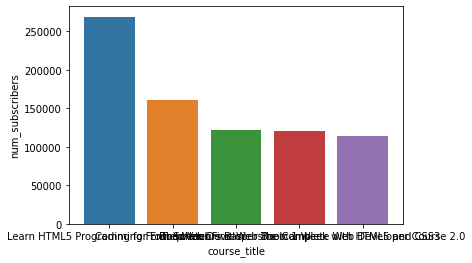

In [82]:
df_sorted_sub = df.sort_values(['num_subscribers'],ascending=[False])[0:5]
fig = sns.barplot(x = df_sorted_sub["course_title"],y = df_sorted_sub["num_subscribers"])
fig.plot()
df_sorted_sub


*   All the top 5 courses with most subscribers are web development courses



,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,levels,subjects,paid_or_not
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,43.0,2015-11-02T21:13:27Z,0,3,1
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,30.5,2016-03-08T22:28:36Z,0,3,1
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,190,73783,19649,329,22.0,2016-02-11T07:29:29Z,0,3,1
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,175,79612,16976,85,11.5,2015-03-12T23:19:54Z,0,3,1
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,180,50815,15117,150,26.5,2015-12-28T19:20:21Z,0,3,1


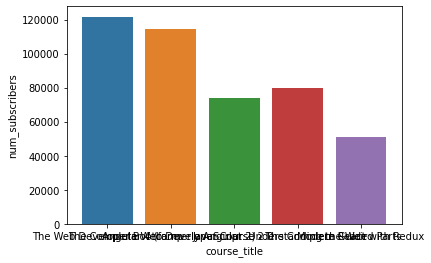

In [83]:
df_sorted_rev = df.sort_values(['num_reviews'],ascending=[False])[0:5]
fig = sns.barplot(x = df_sorted_rev["course_title"],y = df_sorted_rev["num_subscribers"])
fig.plot()
df_sorted_rev

*   Top 5 courses with most number of reviews are also web development courses